<a href="https://colab.research.google.com/github/raedmehyar/18110026-BusinessIntelligence/blob/master/RaedMehyar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Required: Import
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Extra: Message
def header (msg):
  print ('-' * 50)
  print ('' + msg + '\n')

In [0]:
#Required: Load the Dataset
df = pd.read_csv('data.csv', engine='python')

In [853]:
#Extra: Data Preprocessing
header('How many rows do we have?')
print (df.index)
header('What colmuns  do we have?')
print (df.columns)
header('What type of data do we deal with?')
print (df.dtypes)

--------------------------------------------------
How many rows do we have?

RangeIndex(start=0, stop=50, step=1)
--------------------------------------------------
What colmuns  do we have?

Index(['Rank', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')
--------------------------------------------------
What type of data do we deal with?

Rank                 int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object


In [854]:
#Required: Read from the dataset
#Note: Empty argument is a defualt of 5
header('What are the 5 Most listened/streamed tracks?')
print (df.head()[['Track.Name', 'Genre']])
header('What are the 3 Least listened/streamed tracks?')
print (df.tail(3)[['Track.Name', 'Genre']])

--------------------------------------------------
What are the 5 Most listened/streamed tracks?

                        Track.Name           Genre
0                         Se�orita    canadian pop
1                            China  reggaeton flow
2    boyfriend (with Social House)       dance pop
3  Beautiful People (feat. Khalid)             pop
4      Goodbyes (Feat. Young Thug)         dfw rap
--------------------------------------------------
What are the 3 Least listened/streamed tracks?

                                       Track.Name    Genre
47                                        Happier  brostep
48                                  Call You Mine      edm
49  Cross Me (feat. Chance the Rapper & PnB Rock)      pop


In [855]:
#Extra: This is how BI helps in better decision making
header('What are the most listened/streamed Genres?')
df.groupby('Genre')['Genre'].agg(['count']).sort_values(by='count', ascending=False).head(5)

--------------------------------------------------
What are the most listened/streamed Genres?



,count
Genre,
dance pop,8
pop,7
latin,5
edm,3
canadian hip hop,3


--------------------------------------------------
What are the most listened/streamed Genres?



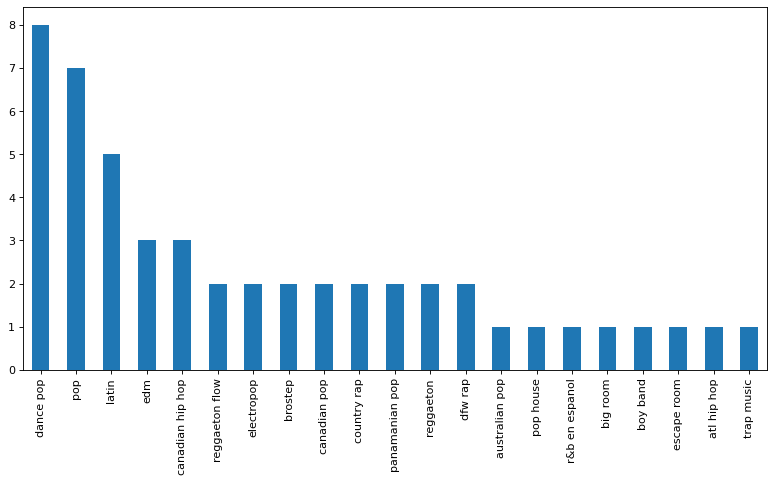

In [856]:
#Required: Produce Plots
header('What are the most listened/streamed Genres?')
figure(num=None, figsize=(12,6), dpi= 80, facecolor='w', edgecolor='k')
df['Genre'].value_counts().plot(kind='bar')

In [857]:
#Extra: This is how BI helps in better decision making
header('Who are the most listened/streamed Artists?')
df.groupby('Artist.Name')['Artist.Name'].agg(['count']).sort_values(by='count', ascending=False).head(10)

--------------------------------------------------
Who are the most listened/streamed Artists?



,count
Artist.Name,
Ed Sheeran,4
Lil Nas X,2
Shawn Mendes,2
Marshmello,2
Post Malone,2
Sech,2
J Balvin,2
The Chainsmokers,2
Billie Eilish,2


In [858]:
#Required: Produce Descriptive Analysis (Mean and Mode)
header('What is the most common level of loudness?')
print(df['Loudness..dB..'].mode())
header('What is the average length?')
print(df['Length.'].mean())

--------------------------------------------------
What is the most common level of loudness?

0   -6
dtype: int64
--------------------------------------------------
What is the average length?

200.96


In [859]:
#Extra: This is how BI helps in better decision making
header('What is the best Length for the chosen Loudness?')
df.groupby(by=['Loudness..dB..'])['Length.'].mean()

--------------------------------------------------
What is the best Length for the chosen Loudness?



Loudness..dB..
-11    189.333333
-9     198.000000
-8     189.666667
-7     203.166667
-6     184.384615
-5     205.250000
-4     218.636364
-3     193.333333
-2     235.000000
Name: Length., dtype: float64

--------------------------------------------------
Does Loudness have a relationship with Length?



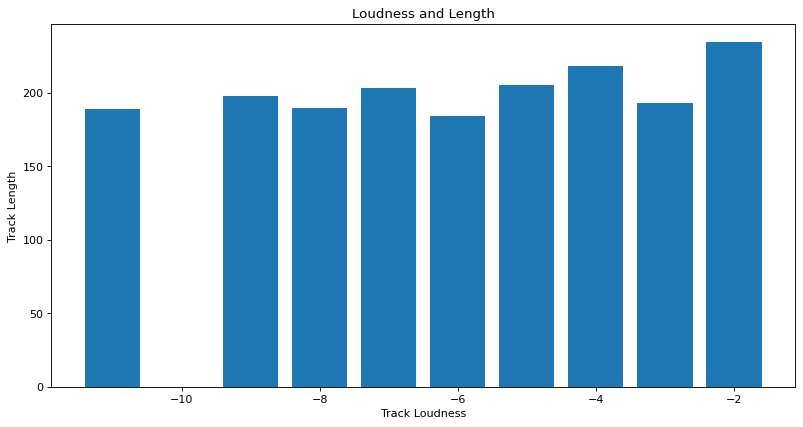

In [860]:
#Required: Produce Plots
header('Does Loudness have a relationship with Length?')
figure(num=None, figsize=(12,6), dpi= 80, facecolor='w', edgecolor='k')
grouped_df = df.groupby(by=['Loudness..dB..'], as_index=False).mean()
grouped_df = grouped_df.sample(9)
xs = grouped_df['Loudness..dB..']
ys = grouped_df['Length.']
plt.bar(xs, ys)
plt.xlabel('Track Loudness')
plt.ylabel('Track Length')
plt.title ('Loudness and Length')
plt.show()

In [861]:
#Extra: This is how BI helps in conducting better reasearch
header('Filtering the most popular tracks for research:')
print(df.sort_values(by='Popularity', ascending=False)[['Track.Name', 'Popularity']][df.Popularity>90])

--------------------------------------------------
Filtering the most popular tracks for research:

                                       Track.Name  Popularity
9                                         bad guy          95
4                     Goodbyes (Feat. Young Thug)          94
10                                       Callaita          93
14       Money In The Grave (Drake ft. Rick Ross)          92
1                                           China          92
6                                          Ransom          92
36                                     Otro Trago          91
21                                         Panini          91
20                            Piece Of Your Heart          91
19                                    Truth Hurts          91
17  Sunflower - Spider-Man: Into the Spider-Verse          91
28                                      Con Calma          91
23                                Soltera - Remix          91


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [862]:
#Extra: A value in the dataset has changed while working on the project
header('The Popularity of Otro Trago has chaanged from 91 to 92 in the last few weeks')
df.loc[36,['Popularity']]=92
print(df.loc[36,['Track.Name','Popularity']])

--------------------------------------------------
The Popularity of Otro Trago has chaanged from 91 to 92 in the last few weeks

Track.Name    Otro Trago
Popularity            92
Name: 36, dtype: object


In [863]:
#Extra: Data Preprocessing- Altering Dataset info
header('New names for Daataaset Columns')
df.rename(columns={'Valence.':'Valence'},inplace=True)
df.rename(columns={'Length.':'Length'},inplace=True)
df.rename(columns={'Acousticness..':'Acousticness'},inplace=True)
df.rename(columns={'Speechiness.':'Speechiness'},inplace=True)
print (df.columns)

--------------------------------------------------
New names for Daataaset Columns

Index(['Rank', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence',
       'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')


--------------------------------------------------
Initial Plot



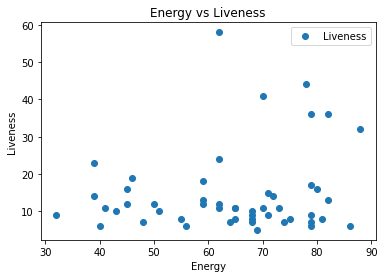

In [864]:
#Required: Produce Predictive Analysis (Linear Regression)
header('Initial Plot')
df.plot(x='Energy', y='Liveness', style='o')  
plt.title('Energy vs Liveness')  
plt.xlabel('Energy')  
plt.ylabel('Liveness')  
plt.show()

In [0]:
#Note: Attributes are the independent variables, and in this case it is the Energy
#Note: Labels are dependent variables, and in this case it is the Liveness
X = df['Energy'].values.reshape(-1,1)
y = df['Liveness'].values.reshape(-1,1)

In [0]:
#Note: Setting test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [867]:
#Note: Training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [868]:
#Note: To retrieve the intercept:
print(regressor.intercept_)
#Note: For retrieving the slope:
print(regressor.coef_)

[3.55123945]
[[0.17567744]]


In [0]:
#Note: Predicting Livness based on Energy
y_pred = regressor.predict(X_test)

In [870]:
#Note: Printing Data
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,6,18.659499
1,15,16.024337
2,24,14.443241
3,7,15.497305
4,16,17.605434
5,19,11.632402
6,11,16.375692
7,9,9.172917
8,9,17.429757
9,11,14.970273


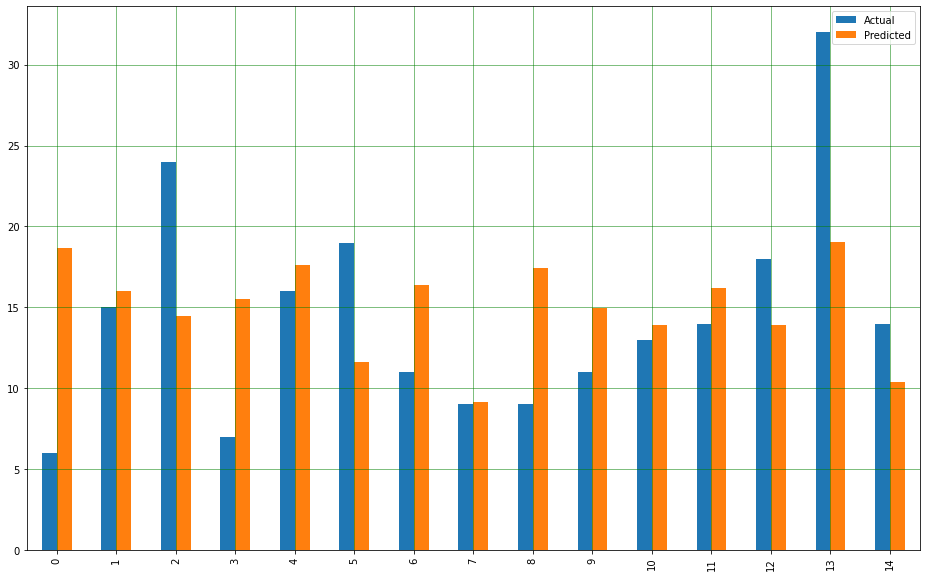

In [871]:
#Note: Ploting Data
df1 = df.head(100)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

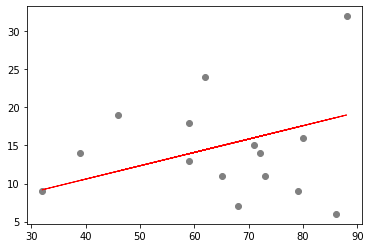

In [872]:
#Note: Final Result
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()